In [1]:
library(corrplot)

corrplot 0.92 loaded



### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [2]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_roots_train_dev_6.csv', h = F)
dim(gum.all)

[1] 6507  768

In [3]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [4]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [5]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

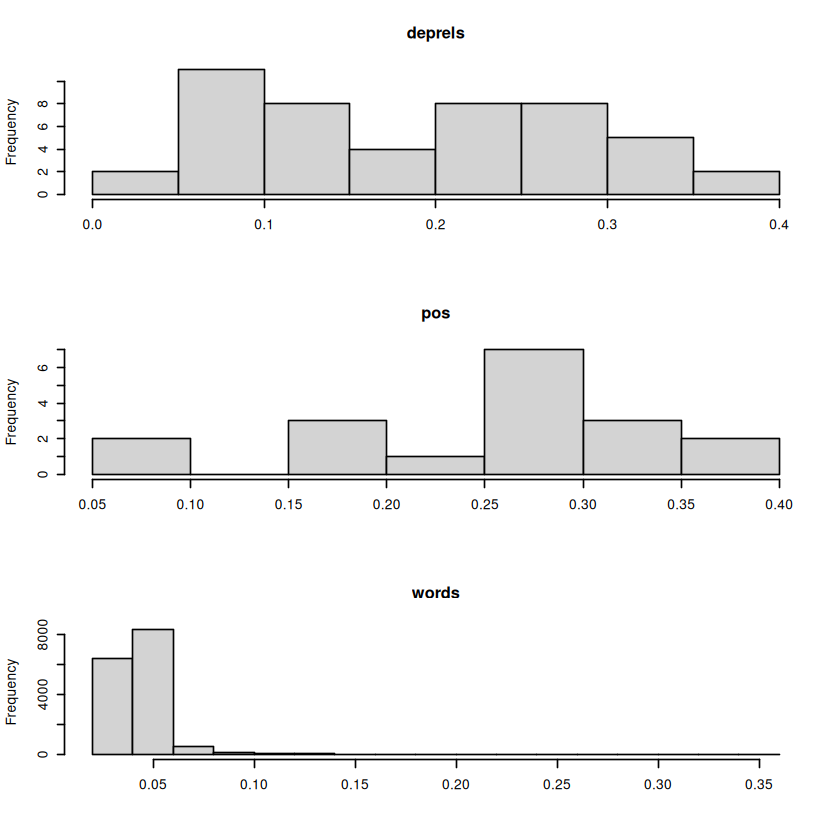

In [6]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

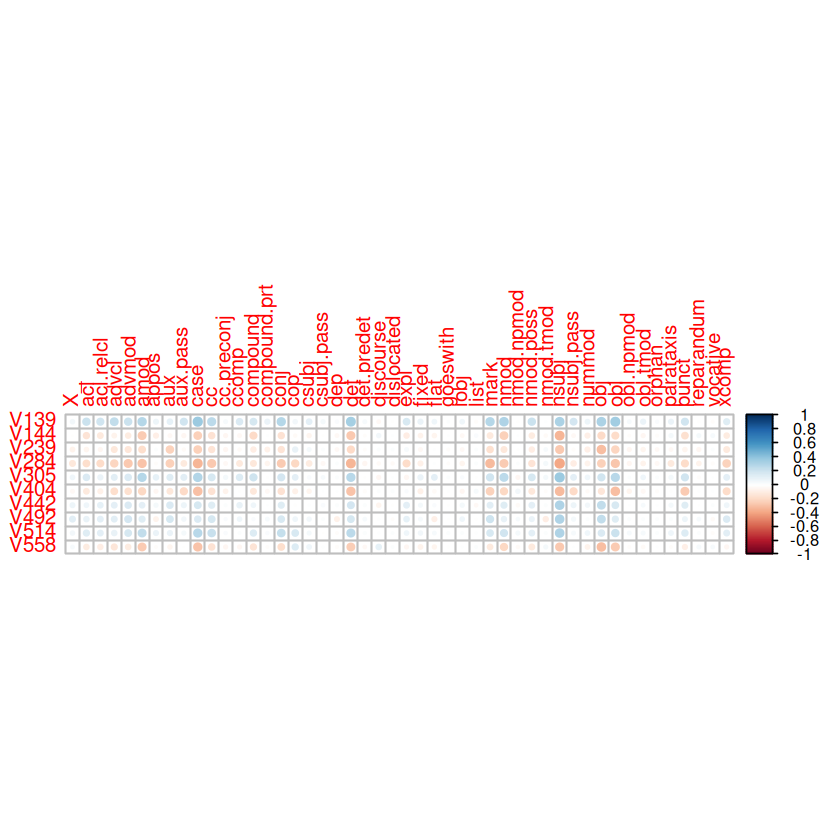

In [7]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.3)
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,])

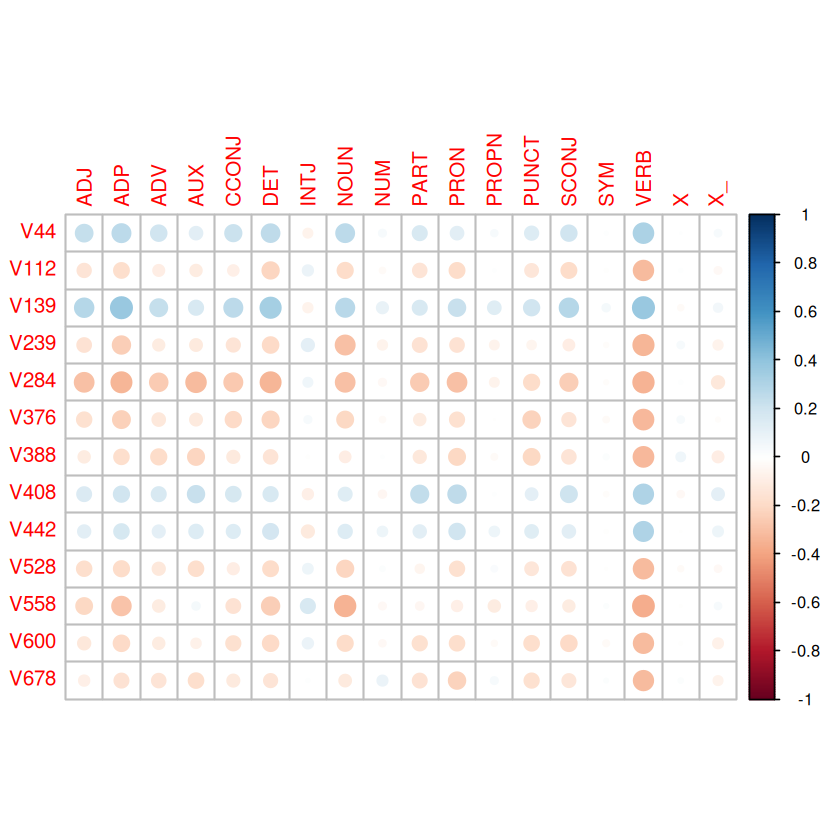

In [8]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.3)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,])

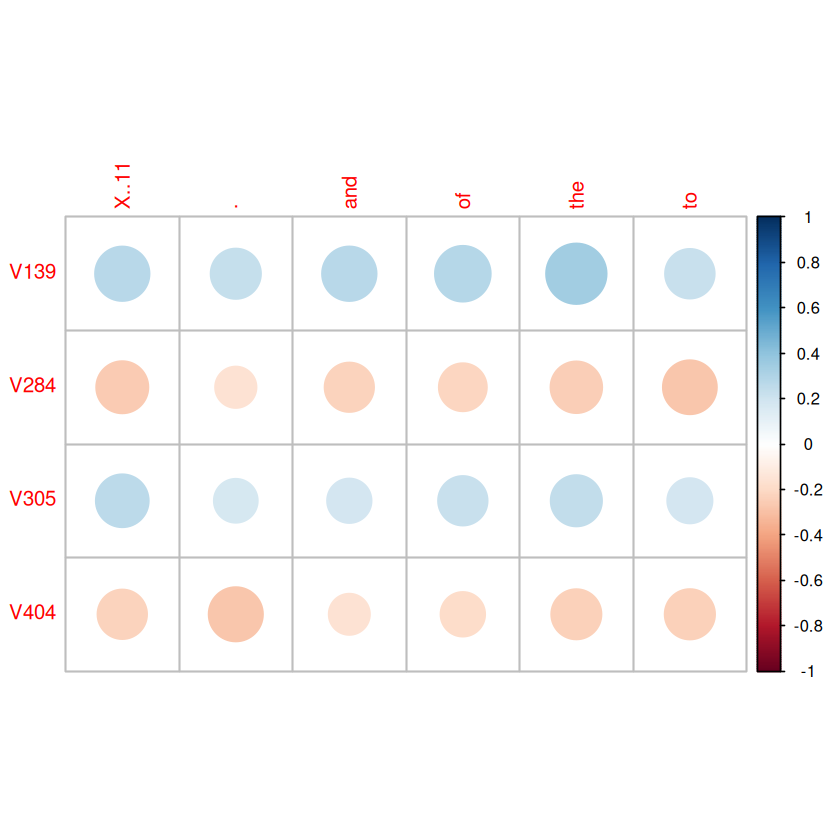

In [9]:
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.25)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.25)
corrplot(gum.pooler.cor.words[prominent.neurons.words,prominent.words])

In [10]:
gum.pooler.pca <- prcomp(gum.all)

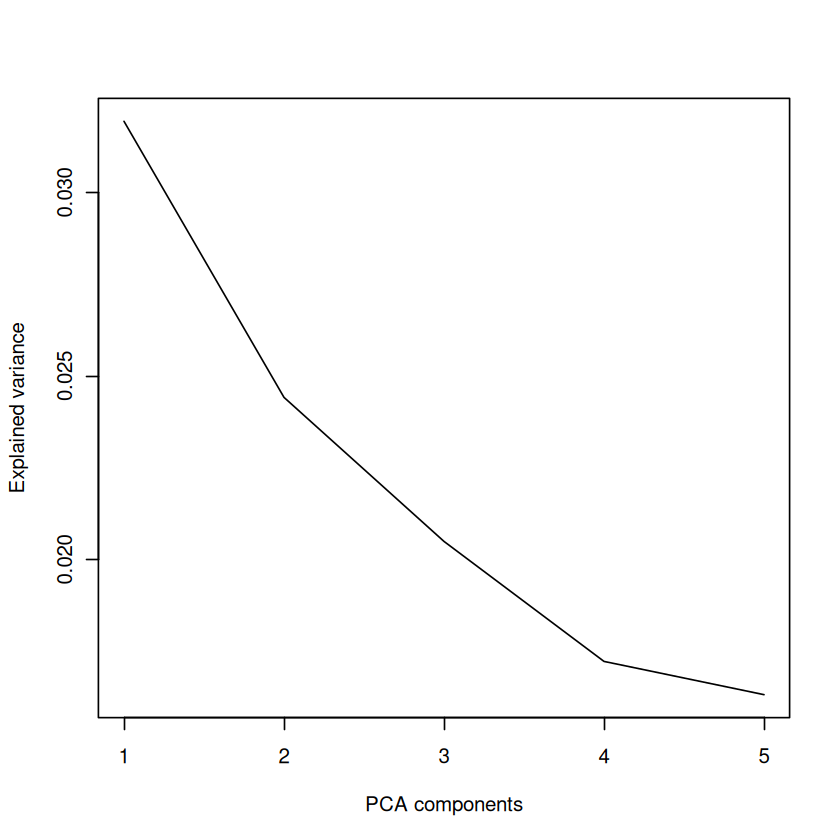

In [11]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [12]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [22]:
show.sentences <- function(sentences, sep='\n\n') {
    for (s in sentences) {
        cat(s); cat(sep)
    }
}

### First principal component

Minimum values: ???

In [26]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=50)], '\t')

Fuck .	Fuck .	Fuck .	No .	No .	No .	No .	No .	No .	No .	Right .	Sunday , October 21 , 2007	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Yeah .	Sure .	Sure .	Monday , July 28 , 2014	Sunday , November 25 , 2007	Um ...	Monday , March 27 , 2006	Sunday , May 28 , 2006	Sunday , May 28 , 2006	Wow .	Wow .	Tuesday , January 28 , 2014	Monday , March 5 , 2007	Right ?	Tuesday , January 21 , 2014	Sunday , August 2 , 2015	Sunday , January 20 , 2008	Down .	Down .	Tuesday , March 8 , 2011	Hmm .	Tuesday , September 1 , 2015	Monday , May 18 , 2015	Tuesday , September 22 , 2015	Six .	

Maximum values: ???

In [15]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Owing to its history , Łódź has an impressive collection of residential , commercial and industrial 19th-century architecture including some of Europe 's largest factory buildings , now mostly repurposed as shopping centres or lofts .

In his observations of pin factories , Smith noticed that one worker alone might make 20 pins in a day , but that a small business of 10 workers ( some of whom would need to complete two or three of the 18 tasks involved with pin-making ) , could make 48,000 pins in a day .

Her experience living in this neighborhood would provide material for several of her later stories , especially " Takekurabe " , ( literally , " Comparing heights " ; " Child 's Play " in the Robert Lyons Danly translation ; also called " Growing Up " in the Edward Seidensticker translation . )

Riders accustomed to flat terrain may find Tulsa 's rolling land to be a bit more challenging , particularly during the heat of summer .

During one of these illnesses ( about the winter of 3

### Second principal component

Minimum values: instructions

In [16]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

Make sure that it is a language that while speaking , you do n't get a literal knot in your tongue !

Make sure that you and your friend(s) all follow a systematic language system .

Take note of how they act , talk , and use their social status .

Have a realistic but exaggerated setup .

Keep a notebook by hand before you start your workday .

Make sure you practice saying and spelling out many basic words in your language , English examples : is , who , when , of , why , if , what , where , can , may , etc .

Make sure it ’s a target your audience will be interested in and something they ’re likely willing to laugh at . [ 2 ]

Make an ultimate to-do list for this single project , and have it placed somewhere you will see it on a regular basis .

Make sure all the pockets are empty .

Look at this .

Look at that .

Look at that .

Look at that .

Take your glowsticks to the party and charge your friends loads of money for them !

Try the " white rice " option if your rice cooker giv

Maximum values: ???

In [17]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

" If an infant 's not getting enough iodine ... brain development wo n't be completed and they wo n't grow normally , and as you get older the problem will be that you will develop a goiter and your thyroid wo n't function as well as it should , so that may have all sorts of pernicious effects upon normal function in life . "

A tourist visa card ( visa de tarjeta del turista ) is necessary for travelers from most nations .

Although the city was not destroyed in the aftermath , the material losses were serious as the machinery , raw materials and finished goods were taken away by the fleeing Nazis .

If you bought packaged quinoa , this step is n't always necessary , but it 's better to be safe than sorry .

In this application , the result of the operation between two polygons has been affected .

For example , if a factory produces only 100 cars per year , each car will be quite expensive to make on average .

Once Bet was asleep it was impossible to wake her up .

The ending of the

### Third principal component

Minimum values: ???

In [18]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=15)])

I embedded a few of the animals in wax and then cut them into very thin slices using a microtome , mounted the slices on microscope slides , stained the slices to enhance contrast , and then looked at those slides under a compound microscope

However , if a factory produces 50,000 cars each year , then it can set up an assembly line with huge machines and workers performing specialized tasks , and the average cost of production per car will be lower .

If wikiHow volunteers think our site is going in the wrong direction , they can take all the content and all the software and move the project elsewhere .

How to Pack Your Possessions When Moving

In a medium saucepan , heat up 2 tablespoons vegetable oil over medium-low heat .

In fact , many people Wikinews observed took out their mobiles as they left for the evening and used their own phone cameras to make one further record of the moment - a photo of a photo .

Pack one room at a time if possible , and start with items that are leas

Maximum values: 1st person

In [19]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

I think it ’s important we have an original take on those things .

They say adding the mineral to salt is the simplest and most effective method of preventing iodine deficiency disorders .

Seventeen-year-olds sleep on friends ’ couches , I know .

I think it ’s similar to what Colbert said to Terry Gross .

“ Cara , ” I say .

" Had it happened five hours earlier or four hours earlier , I think the death toll would have been more than a thousand . "

You know .

You know .

You know .

In terms of the evolution of photography and experimentation , like painting on them or the celebrity fascination , I think he was really ground-breaking in that regard . "

What do you think the impact will be for the Paralympic movement will be with the Games being televised live in the United States for first time ?

“ I can just make a sandwich , ” I say .

“ You ready to go back to see Mom ? ” I say .

“ She wanted to go in Spencer ’s , ” I say .

They said , they already determined it was in like

### Fourth principal component

Mininum values: modal verbs

In [20]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=15)])

You do n’t need to have it completely memorized — in fact , you " should n’t " memorize it — but you need to be really comfortable with it , so comfortable that you can continue on with telling it even if you get nervous or sidetracked , which is very possible once you ’re in front of an audience .

You ’ve got to do something about —

I do n't care if a girl is absolutely exquisite looking --

But I also need to clear a lot of these out because I know a lot of these lipsticks are at least over like two three years old and that 's like not okay .

So you do n't need to go borrow equipment from anybody , to to do the feet ?

I do n't want this to be too , like , all over the place but I decided I do want to document this some way , whether I – At first I was like , I do n't need to copy it on YouTube but I definitely wanted to document this in some kind of video form , just because it 's such a huge thing .

However you do n't have to have magical powers to play .

I do n’t want to call

Maximum values: quotes with a verb of speech

In [21]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=20)])

" I study history in school , " I said .

“ It ’s just that there are more children in the world now , ” he said .

" What 's your name ? " Carroll said .

" Had it happened an hour later it would have been much worse , " Khaled Al-Maeena , editor at large at the Saudi Gazette , said .

" I thought that in real life it was really kind of magical , " Allton said .

“ Oh hello , Mrs. Claus , ” Ginny said .

“ You know that ’s pretty gross … ” he said .

“ Got any other brilliant remarks ? ” I said .

“ And now I ’m gon na have a bruise on my butt , too , ” she said .

But at the other end of the scale we 've got to make sure the people who eat a lot of food - we all know the teenage boy who comes home from school and eats a whole loaf of bread - that those people do n't get too much and get overdose , " Ms Bauchtman said .

“ We need a plan , ” I said .

“ Hey ! Not bad that ! ” Pete said .

“ Perhaps you can use it in exams … ” Pete said , scratching his head .

“ Do n’t get much older 